In [1]:
import cv2
import copy
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim

### - Read Video

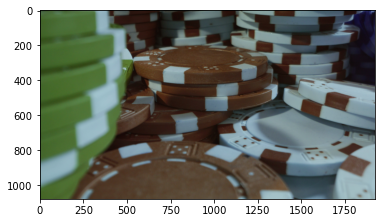

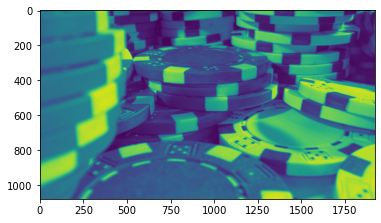

In [2]:
video_path  = './mixkit-lots-of-chips-and-dice-arranged-on-a-game-table-42931.mp4'
cap = cv2.VideoCapture(video_path)
ret, current_frame = cap.read()
if ret:
    # Init first frame and privious frame
    previous_frame = copy.deepcopy(current_frame)
    first_frame = copy.deepcopy(current_frame)
    first_frame_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    plt.figure()
    plt.imshow(first_frame)
    plt.figure()
    plt.imshow(first_frame_gray)

### - Var

In [3]:
f_id = 0
score_threshold = 0.65
frame_diff_previous_frame_list = []
frame_diff_first_frame_list = []

### - Frame Differences

f_id: 50
Current frame, Percent Difference: 0.611905001512893% --> Different enough
First frame, Percent Difference: 0.5302252486045318% --> Different enough
f_id: 100
Current frame, Percent Difference: 0.7023785304598505% --> Not different enough
First frame, Percent Difference: 0.4930110551010933% --> Different enough
f_id: 150
Current frame, Percent Difference: 0.7427964906716661% --> Not different enough
First frame, Percent Difference: 0.41335313307906335% --> Different enough


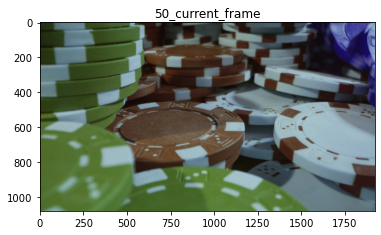

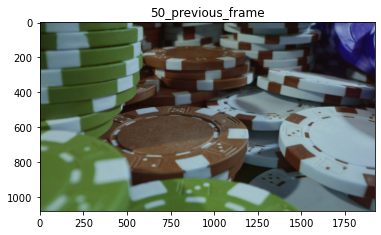

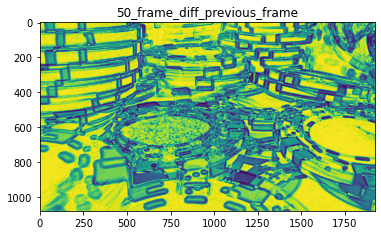

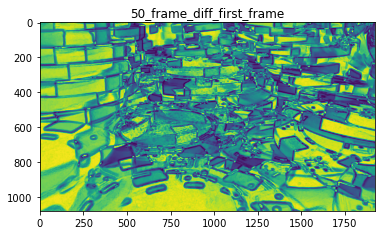

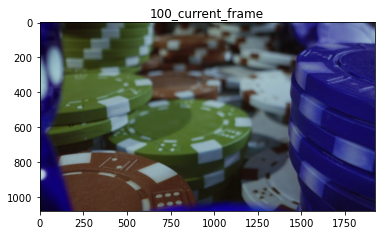

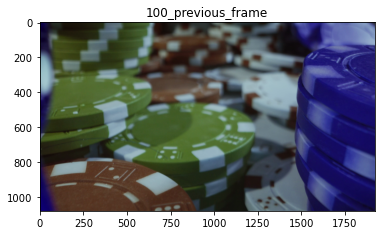

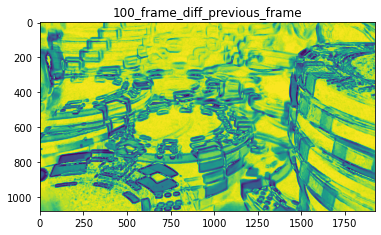

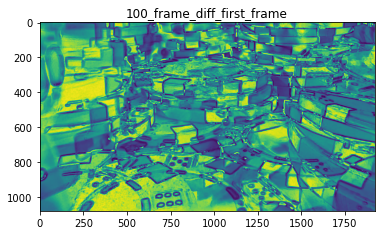

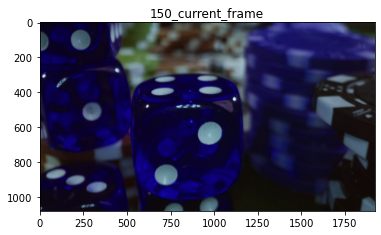

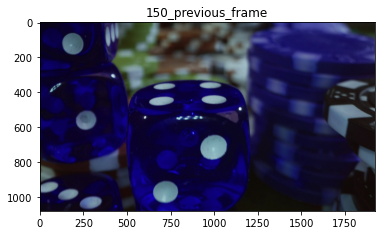

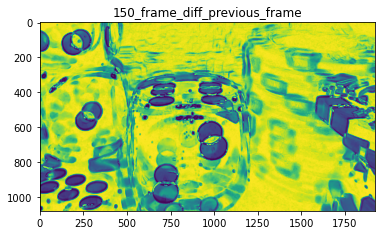

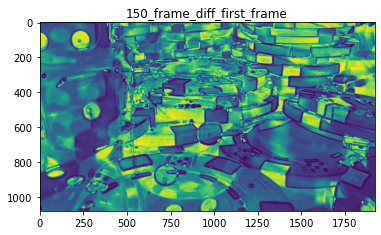

In [4]:
while(cap.isOpened()):
    
    # Frame id
    f_id = f_id + 1
    
    # Gray scale
    current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    previous_frame_gray = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)
    
    # Frame diff: current frame and previous frame
    # score = 1: perfecly same
    frame_diff_previous_score, frame_diff_previous_frame = compare_ssim(current_frame_gray, previous_frame_gray, full=True)
    frame_diff_previous_frame = (frame_diff_previous_frame * 255).astype("uint8")
    
    frame_diff_previous_frame_list.append(frame_diff_previous_score)
    
    # Frame diff: current frame and first frame
    # score = 1: perfecly same
    frame_diff_first_score, frame_diff_first_frame = compare_ssim(current_frame_gray, first_frame_gray, full=True)
    frame_diff_first_frame = (frame_diff_first_frame * 255).astype("uint8")  
    
    frame_diff_first_frame_list.append(frame_diff_first_score)
    
    # Visualization area identified as “different”
    if f_id % 50 == 0:
        print('f_id:', f_id)

        plt.figure()
        plt.title(str(f_id)+'_'+'current_frame')
        plt.imshow(current_frame)

        plt.figure()
        plt.title(str(f_id)+'_'+'previous_frame')
        plt.imshow(previous_frame)        
        
        plt.figure()
        plt.title(str(f_id)+'_'+'frame_diff_previous_frame')
        plt.imshow(frame_diff_previous_frame)
        
        if frame_diff_previous_score > score_threshold:
            print(f'Current frame, Percent Difference: {frame_diff_previous_score}% --> Not different enough')
        else:
            print(f'Current frame, Percent Difference: {frame_diff_previous_score}% --> Different enough')   

        plt.figure()
        plt.title(str(f_id)+'_'+'frame_diff_first_frame')
        plt.imshow(frame_diff_first_frame)
 
        if frame_diff_first_score > score_threshold:
            print(f'First frame, Percent Difference: {frame_diff_first_score}% --> Not different enough')
        else:
            print(f'First frame, Percent Difference: {frame_diff_first_score}% --> Different enough')  

    if f_id % 5 == 0:
        previous_frame = current_frame.copy()
    ret, current_frame = cap.read()
    
    if not ret:
        break

cap.release()
cv2.destroyAllWindows()

### - Histogram

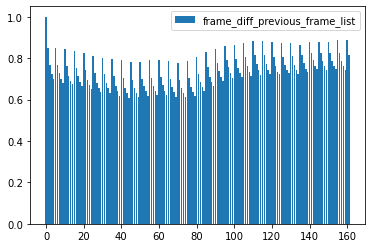

In [5]:
plt.figure()
plt.bar(range(0, len(frame_diff_previous_frame_list)), frame_diff_previous_frame_list, label='frame_diff_previous_frame_list')
plt.legend()
plt.show()

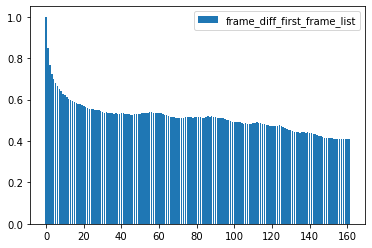

In [6]:
plt.figure()
plt.bar(range(0, len(frame_diff_previous_frame_list)), frame_diff_first_frame_list, label='frame_diff_first_frame_list')
plt.legend()
plt.show()